# DSDM Assignment 2, Project 2
# Learning from Imbalanced Datasets (Supervised and Unsupervised Learning)

# David Brookes April 2020
# Reg No 1900885

In [1]:
import pandas as pd 
import numpy as np
import math
import sklearn
#print(sklearn.__version__)

In [2]:
# Load the preprocessed imbalanced data into dataframes.
# Note: 'r' allows backslashes (and forward slashes) in the file path name.

# df_citrus = pd.read_csv(r"D:\My Documents\Essex Mdrive\Data Science and DM\Assignment 2 files\Data\Preprocessed\citrus_prep.csv",header=0)
df_citrus = pd.read_csv("https://raw.githubusercontent.com/DavidB363/file-store/master/Assignment1/citrus_prep.csv",header=0)
#df_citrus.head()

In [3]:
# df_Breast = pd.read_csv(r"D:\My Documents\Essex Mdrive\Data Science and DM\Assignment 2 files\Data\Preprocessed\Breast_cancer_data_prep.csv",header=0)
df_Breast = pd.read_csv("https://raw.githubusercontent.com/DavidB363/file-store/master/Assignment1/Breast_cancer_data_prep.csv",header=0)
#df_Breast.head()

In [4]:
# df_Heart = pd.read_csv(r"D:\My Documents\Essex Mdrive\Data Science and DM\Assignment 2 files\Data\Preprocessed\Heart Disease Dataset_prep.csv",header=0)
df_Heart = pd.read_csv("https://raw.githubusercontent.com/DavidB363/file-store/master/Assignment1/Heart%20Disease%20Dataset_prep.csv",header=0)
#df_Heart.head()

In [5]:
# Split data into X and y (i.e. predictor and response variables respectively).

df_citrus_X = df_citrus.drop(columns='name')
df_citrus_y=  df_citrus['name']

df_Breast_X = df_Breast.drop(columns='diagnosis')
df_Breast_y=  df_Breast['diagnosis']

df_Heart_X = df_Heart.drop(columns='target')
df_Heart_y=  df_Heart['target']

# print(df_Breast_X.head())
# print(df_Breast_y)

#print(type(df_Breast_X))
#print(df_Breast_X.shape)
# print(type(df_Breast_y))

In [6]:

# Convert from dataframe to numpy array.

X_and_y_citrus_data = df_citrus.to_numpy() # All the data.
X_citrus_data = df_citrus_X.to_numpy() # X data.
y_citrus_data = df_citrus_y.to_numpy() # y data.

X_and_y_Breast_data = df_Breast.to_numpy() 
X_Breast_data = df_Breast_X.to_numpy()
y_Breast_data = df_Breast_y.to_numpy()

X_and_y_Heart_data = df_Heart.to_numpy()
X_Heart_data = df_Heart_X.to_numpy()
y_Heart_data = df_Heart_y.to_numpy()

# Create a dataframe with the data in numpy array format.

# Set the index and column names.
database_rows = ['Citrus', 'Heart Disease', 'Breast Cancer']
database_columns = ['X_data', 'y_data', 'X_and_y_data']

#Create a list of lists.
database = [[X_citrus_data, y_citrus_data, X_and_y_citrus_data],[X_Heart_data, y_Heart_data, X_and_y_Heart_data],[X_Breast_data, y_Breast_data, X_and_y_Breast_data]]

# Create a dataframe with the data in numpy array format from the list of lists.
df_database = pd.DataFrame(database, columns = database_columns, index = database_rows) 

# print(df_database.head())


# Fit a random forest classifier to the datasets and perform K fold cross validation. 
# Note that stratified sampling is NOT applied here.

In [7]:
# Fit a random forest classifier to the datasets.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from statistics import mean, stdev 


clf = RandomForestClassifier(max_depth=2, random_state=123, n_estimators=100)
kf = KFold(n_splits=10, random_state=123, shuffle=True)
# print(kf)

# Fit the classifier, predict and return the score.

def fit_predict_score1(X,y):

    acc_scores=[]
    balanced_acc_scores=[]
    f1_scores=[]

    for train_index, test_index in kf.split(X):
        # print("TRAIN:", train_index, "TEST:", test_index)
        # print('train -  {}   |   test -  {}'.format(np.bincount(y[train_index]), np.bincount(y[test_index])))
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Fit the classifier.
        clf.fit(X_train, y_train)

        # Perform predictions.
        y_pred = clf.predict(X_test)
        y_true = y[test_index]
        
        # Calculate scores.
        acc_score = accuracy_score(y_true, y_pred)
        acc_scores.append(acc_score)
        # print('Accuracy score:', acc_score)

        balanced_acc_score = balanced_accuracy_score(y_true, y_pred)
        balanced_acc_scores.append(balanced_acc_score)
        # print('Balanced accuracy score:', balanced_acc_score)

        f1_score_ = f1_score(y_true, y_pred)
        f1_scores.append(f1_score_)
        # print('F1 score:', f1_score_)

    mean_accuracy_score = mean(acc_scores)
    sd_accuracy_score = stdev(acc_scores)
    # print('Mean accuracy score:', mean_accuracy_score)
    # print('Standard deviation accuracy score:', sd_accuracy_score)


    mean_balanced_accuracy_score = mean(balanced_acc_scores)
    sd_balanced_accuracy_score = stdev(balanced_acc_scores)
    # print('Mean balanced accuracy score:', mean_balanced_accuracy_score)
    # print('Standard deviation balanced Accuracy score:', sd_balanced_accuracy_score)


    mean_f1_score = mean(f1_scores)
    sd_f1_score = stdev(f1_scores)
    # print('Mean f1 score:', mean_f1_score)
    # print('Standard deviation f1 score:', sd_f1_score)
    

    score_summary, score_data = [mean_accuracy_score, sd_accuracy_score, mean_balanced_accuracy_score, sd_balanced_accuracy_score, mean_f1_score, sd_f1_score],[acc_scores, balanced_acc_scores, f1_scores]
    results = [score_summary, score_data]
    return(results)


In [8]:

# Create a dataframe of scores.
row_names = database_rows # i.e. ['Citrus', 'Heart Disease', 'Breast Cancer']
column_names = ['Mean Acc', 'SD Acc', 'Mean Bal Acc', 'SD Bal Acc', 'Mean F1', 'SD F1' ]

df_scores1 = pd.DataFrame(columns = column_names, index=row_names)

column_names = ['Acc', 'Bal Acc','F1']
df_score_data1 = pd.DataFrame(columns = column_names, index=row_names)
   
# Fit the classifier and return the score for all the datasets.

for i in  database_rows:
    scores_summary1, score_data1  = fit_predict_score1(df_database.loc[i,'X_data'],df_database.loc[i,'y_data'])
    df_scores1.at[i] = scores_summary1
    df_score_data1.at[i] =  score_data1 

print(df_scores1)

       

               Mean Acc      SD Acc Mean Bal Acc   SD Bal Acc   Mean F1  \
Citrus         0.998561  0.00141982       0.9992  0.000797027  0.999199   
Heart Disease   0.86381   0.0910716     0.697222     0.148985  0.919221   
Breast Cancer  0.894392   0.0542314     0.875683    0.0589832  0.917861   

                    SD F1  
Citrus         0.00079854  
Heart Disease   0.0576729  
Breast Cancer   0.0450075  


# Fit a random forest classifier to the datasets and perform K fold cross validation.

# Note that stratified sampling IS applied here.

In [9]:
# Fit a random forest classifier to the datasets.

# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold
# from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
# from statistics import mean, stdev 


#clf = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100)
skf = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)
# print(skf)

# Fit the classifier, predict and return the score.

def fit_predict_score2(X,y):

    acc_scores=[]
    balanced_acc_scores=[]
    f1_scores=[]
    
    for train_index, test_index in skf.split(X,y):
        # print("TRAIN:", train_index, "TEST:", test_index)
        # print('train -  {}   |   test -  {}'.format(np.bincount(y[train_index]), np.bincount(y[test_index])))
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Fit the classifier.
        clf.fit(X_train, y_train)

        # Perform predictions.
        y_pred = clf.predict(X_test)
        y_true = y[test_index]
        
        # Calculate scores.
        acc_score = accuracy_score(y_true, y_pred)
        acc_scores.append(acc_score)
        # print('Accuracy score:', acc_score)

        balanced_acc_score = balanced_accuracy_score(y_true, y_pred)
        balanced_acc_scores.append(balanced_acc_score)
        # print('Balanced accuracy score:', balanced_acc_score)

        f1_score_ = f1_score(y_true, y_pred)
        f1_scores.append(f1_score_)
        # print('F1 score:', f1_score_)


    mean_accuracy_score = mean(acc_scores)
    sd_accuracy_score = stdev(acc_scores)
    # print('Mean accuracy score:', mean_accuracy_score)
    # print('Standard deviation accuracy score:', sd_accuracy_score)


    mean_balanced_accuracy_score = mean(balanced_acc_scores)
    sd_balanced_accuracy_score = stdev(balanced_acc_scores)
    # print('Mean balanced accuracy score:', mean_balanced_accuracy_score)
    # print('Standard deviation balanced Accuracy score:', sd_balanced_accuracy_score)


    mean_f1_score = mean(f1_scores)
    sd_f1_score = stdev(f1_scores)
    # print('Mean f1 score:', mean_f1_score)
    # print('Standard deviation f1 score:', sd_f1_score)
    
    # print('\n')
    
    #Create a list of results.
    # scores = [mean_accuracy_score, sd_accuracy_score, mean_balanced_accuracy_score, sd_balanced_accuracy_score, mean_f1_score, sd_f1_score]
    # return(scores)
    
    score_summary, score_data = [mean_accuracy_score, sd_accuracy_score, mean_balanced_accuracy_score, sd_balanced_accuracy_score, mean_f1_score, sd_f1_score],[acc_scores, balanced_acc_scores, f1_scores]
    results = [score_summary, score_data]
    return(results)


In [10]:
# Create a dataframe of scores.
row_names = database_rows # i.e. ['Citrus', 'Heart Disease', 'Breast Cancer']
column_names = ['Mean Acc', 'SD Acc', 'Mean Bal Acc', 'SD Bal Acc', 'Mean F1', 'SD F1' ]

df_scores2 = pd.DataFrame(columns = column_names, index=row_names)

column_names = ['Acc', 'Bal Acc','F1']
df_score_data2 = pd.DataFrame(columns = column_names, index=row_names)
   
# Fit the classifier and return the score for all the datasets.


for i in  database_rows:
    scores_summary2, score_data2  = fit_predict_score2(df_database.loc[i,'X_data'],df_database.loc[i,'y_data'])
    df_scores2.at[i] = scores_summary2
    df_score_data2.at[i] =  score_data2 

print(df_scores2)





               Mean Acc      SD Acc Mean Bal Acc  SD Bal Acc   Mean F1  \
Citrus         0.998561  0.00221104       0.9992  0.00122927  0.999198   
Heart Disease  0.858939   0.0647997     0.668934    0.137453  0.918724   
Breast Cancer  0.887366   0.0356124     0.862078   0.0439995  0.914907   

                    SD F1  
Citrus         0.00123399  
Heart Disease   0.0363418  
Breast Cancer   0.0257407  


In [11]:
print(df_scores1)
       

               Mean Acc      SD Acc Mean Bal Acc   SD Bal Acc   Mean F1  \
Citrus         0.998561  0.00141982       0.9992  0.000797027  0.999199   
Heart Disease   0.86381   0.0910716     0.697222     0.148985  0.919221   
Breast Cancer  0.894392   0.0542314     0.875683    0.0589832  0.917861   

                    SD F1  
Citrus         0.00079854  
Heart Disease   0.0576729  
Breast Cancer   0.0450075  


In [12]:
print(df_scores2)
       

               Mean Acc      SD Acc Mean Bal Acc  SD Bal Acc   Mean F1  \
Citrus         0.998561  0.00221104       0.9992  0.00122927  0.999198   
Heart Disease  0.858939   0.0647997     0.668934    0.137453  0.918724   
Breast Cancer  0.887366   0.0356124     0.862078   0.0439995  0.914907   

                    SD F1  
Citrus         0.00123399  
Heart Disease   0.0363418  
Breast Cancer   0.0257407  


# Determine the number of clusters by using the Elbow Method.
# This requires human judgement to a great extent.

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# skf = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)

def elbow_method(X,y,X_and_y):
    
    num_clusters = range(1,10)

    X_train = X
    wcss = []
    for i in num_clusters:
        kmeans=KMeans(i,random_state=123)
        kmeans.fit( X_train)
        wcss_iter = kmeans.inertia_
        #print('K= ', i)
        #print('WCSS, inertia_: ', kmeans.inertia_ )
        #print('Cluster centres: ',kmeans.cluster_centers_ )
        #print('Labels: ',kmeans.labels_ )
        #print('Length of Labels: ',len(kmeans.labels_) )
        #print('Num iterations: ',kmeans.n_iter_ )
        #print('\n')
        wcss.append(wcss_iter)
    # print(wcss)

    plt.plot(num_clusters, wcss)
    plt.show()
    print('\n')



DATASET : Citrus




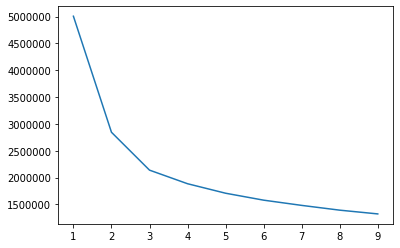





DATASET : Heart Disease




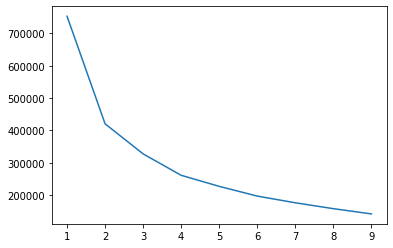





DATASET : Breast Cancer




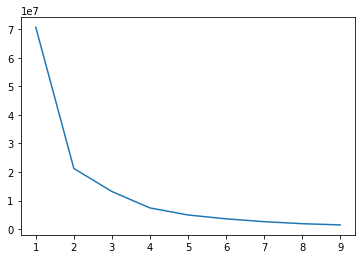

In [14]:
for i in  database_rows:
    X = df_database.loc[i,'X_data']
    y = df_database.loc[i,'y_data']
    X_and_y = df_database.loc[i,'X_and_y_data']
    print('DATASET :',i)
    print('\n')
    elbow_method(X, y, X_and_y)
    print('\n')

# A look at the graphs of wcss generated for the three datasets suggest:
# K = 2 or 3 for the Citrus data set.
# K = 2 for the Heart Disease data set.
# K = 2 for the Breast Cancer data set.

# Determine the number of clusters using the Silhouette Method.

In [15]:
#from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import numpy as np


def silhouette_method(X,y,X_and_y):
    
    range_n_clusters = range(2,7)

    X_train = X

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 123 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=123)
        cluster_labels = clusterer.fit_predict(X_train)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X_train, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

DATASET : Citrus


For n_clusters = 2 The average silhouette_score is : 0.3696430848619438
For n_clusters = 3 The average silhouette_score is : 0.2886026566258433
For n_clusters = 4 The average silhouette_score is : 0.22217450476921657
For n_clusters = 5 The average silhouette_score is : 0.2193259738507636
For n_clusters = 6 The average silhouette_score is : 0.21648629199843092


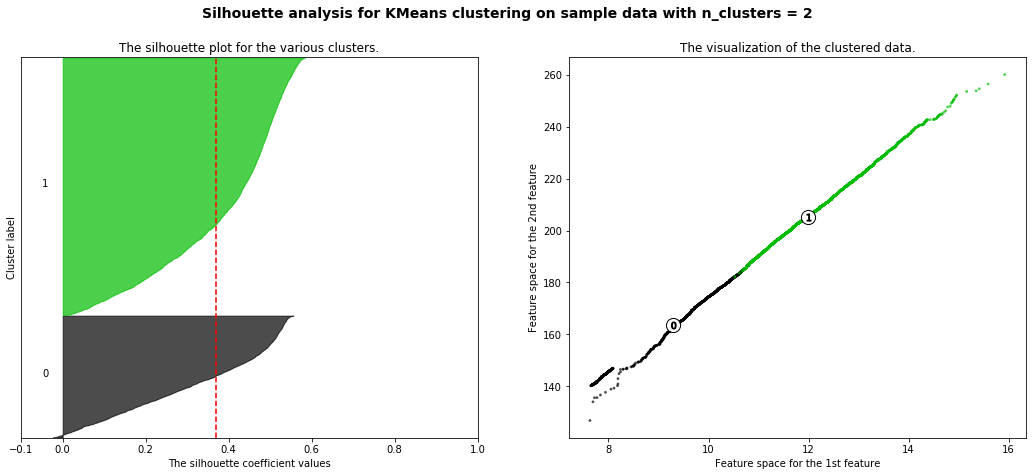

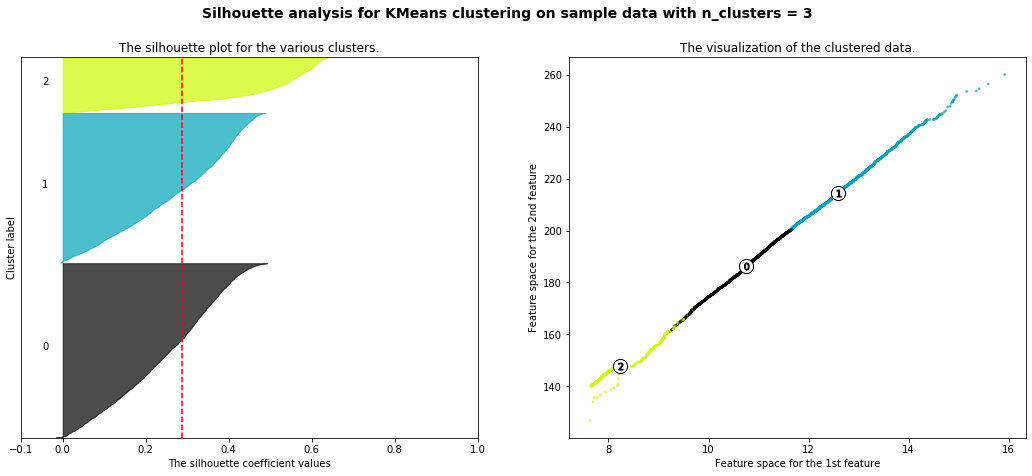

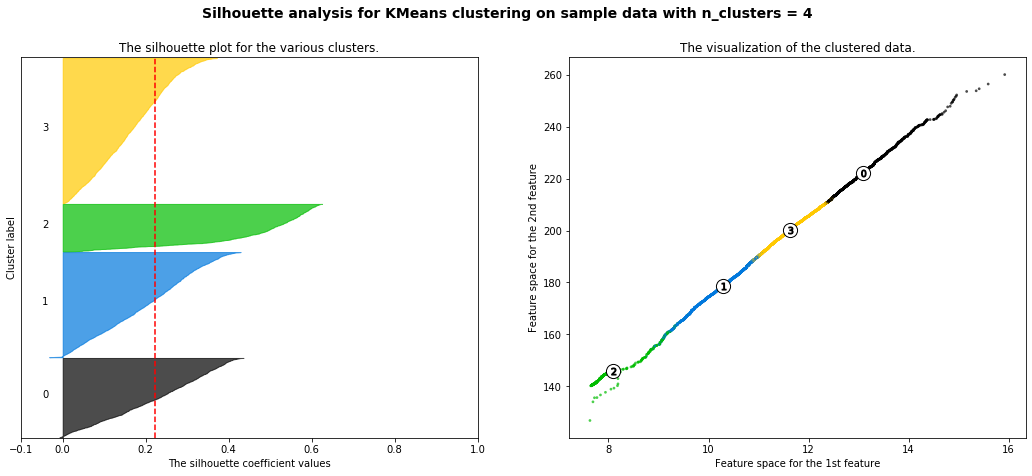

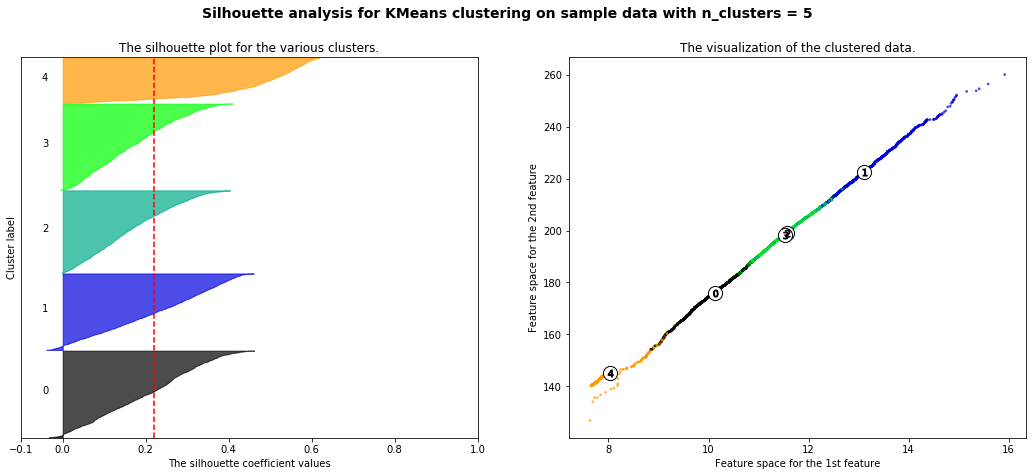

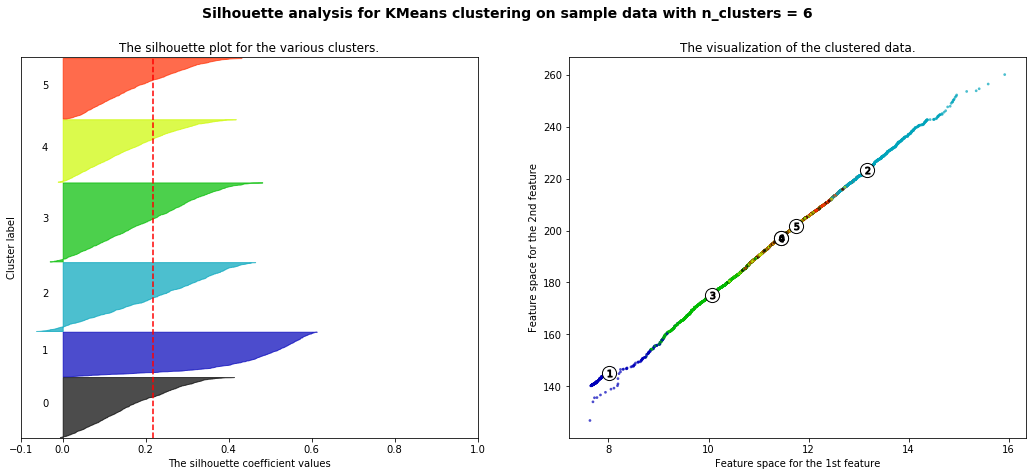



DATASET : Heart Disease


For n_clusters = 2 The average silhouette_score is : 0.4012802833650734
For n_clusters = 3 The average silhouette_score is : 0.36707452439752475
For n_clusters = 4 The average silhouette_score is : 0.2686543107739513
For n_clusters = 5 The average silhouette_score is : 0.2655310145240285
For n_clusters = 6 The average silhouette_score is : 0.27925073336957834


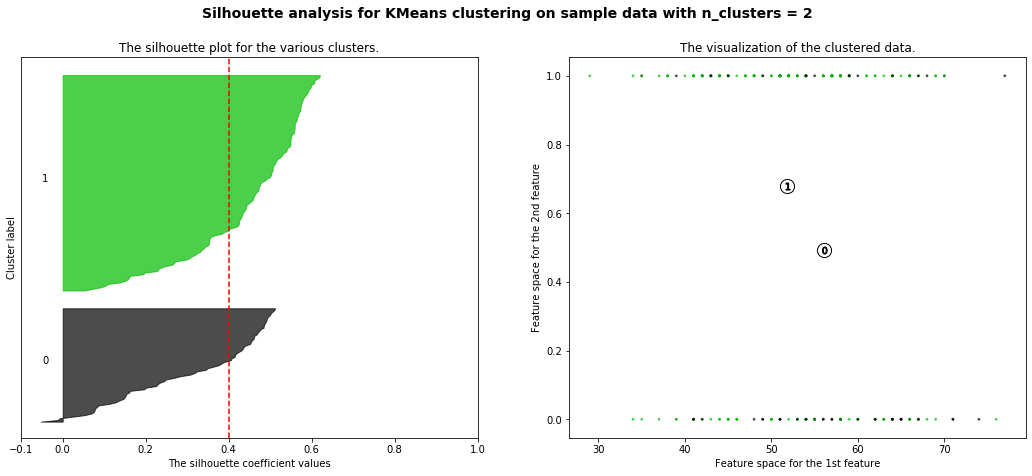

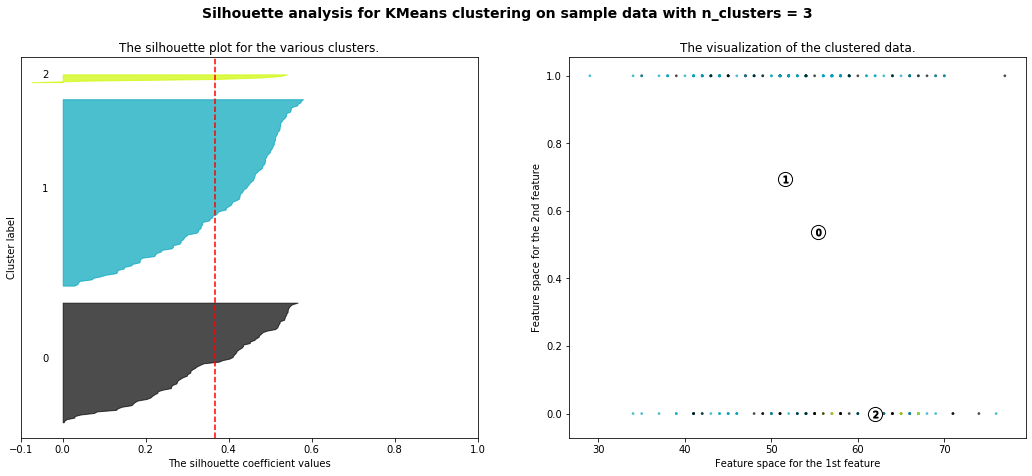

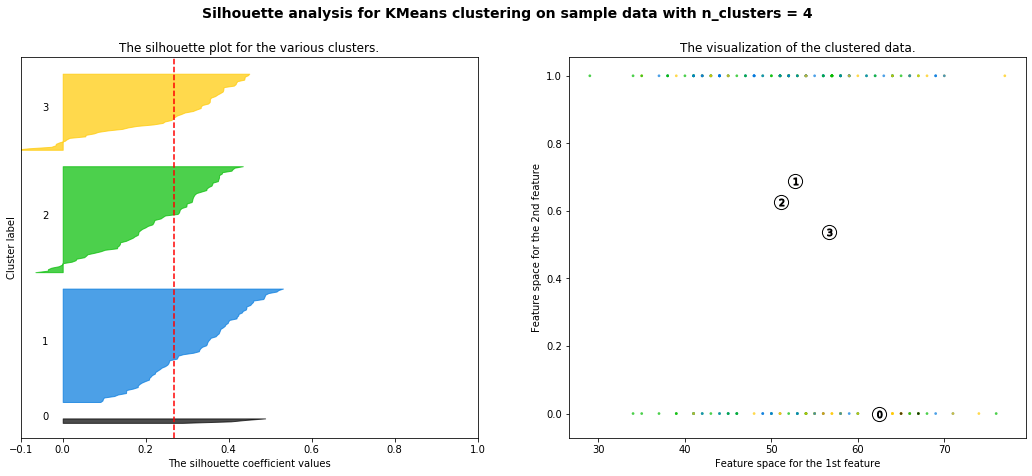

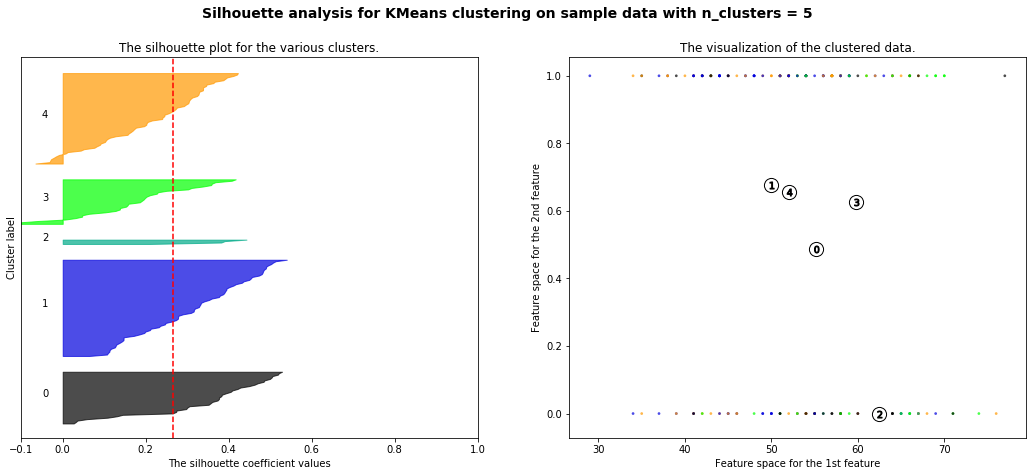

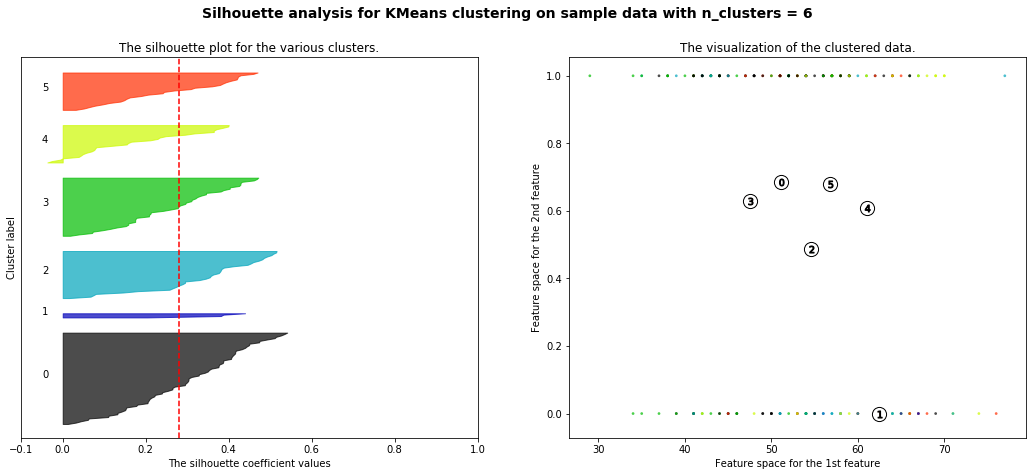



DATASET : Breast Cancer


For n_clusters = 2 The average silhouette_score is : 0.699135645499053
For n_clusters = 3 The average silhouette_score is : 0.56535811144332
For n_clusters = 4 The average silhouette_score is : 0.5585054759632104
For n_clusters = 5 The average silhouette_score is : 0.5441764972414568
For n_clusters = 6 The average silhouette_score is : 0.5303315373199656


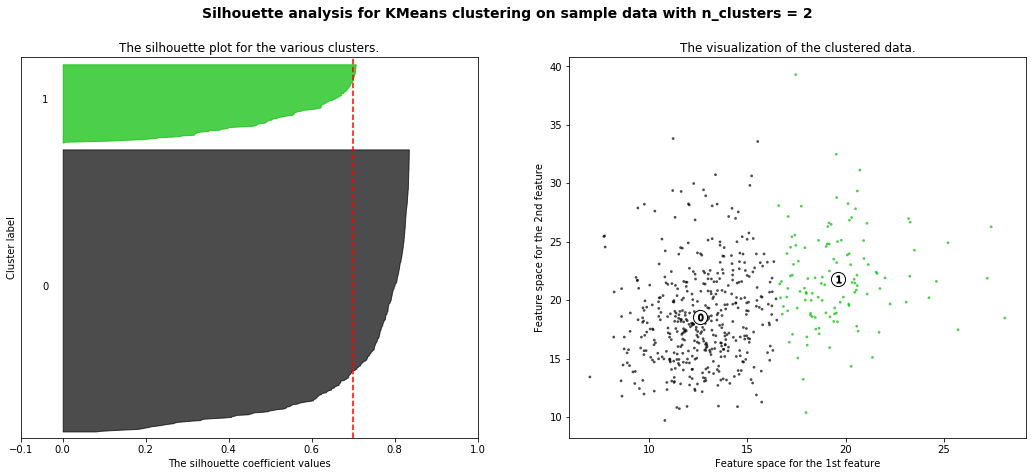

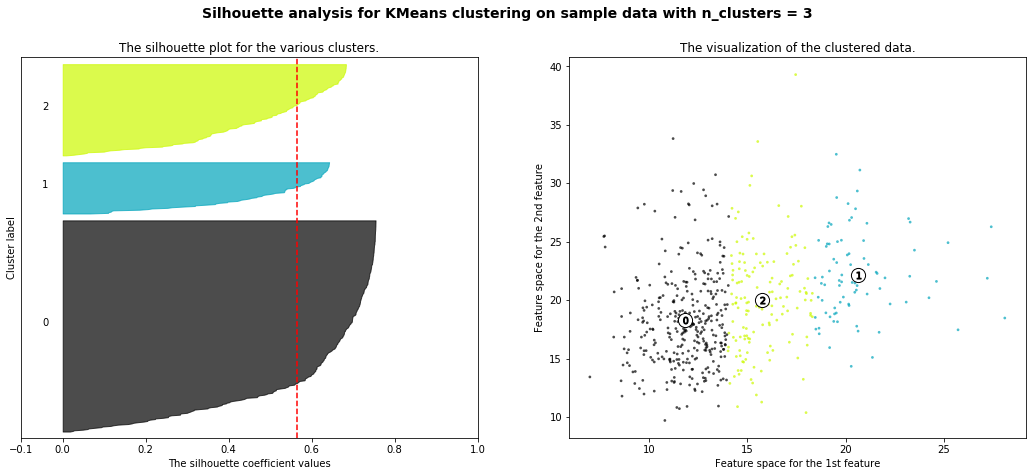

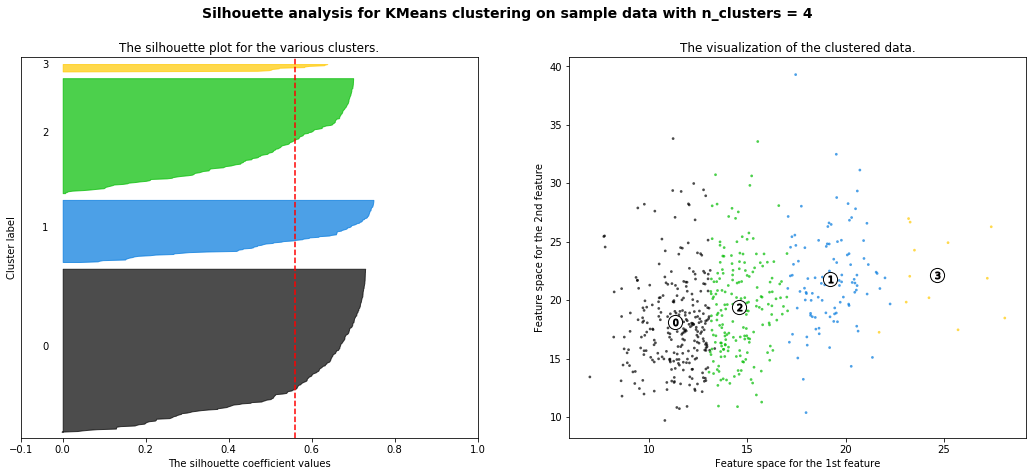

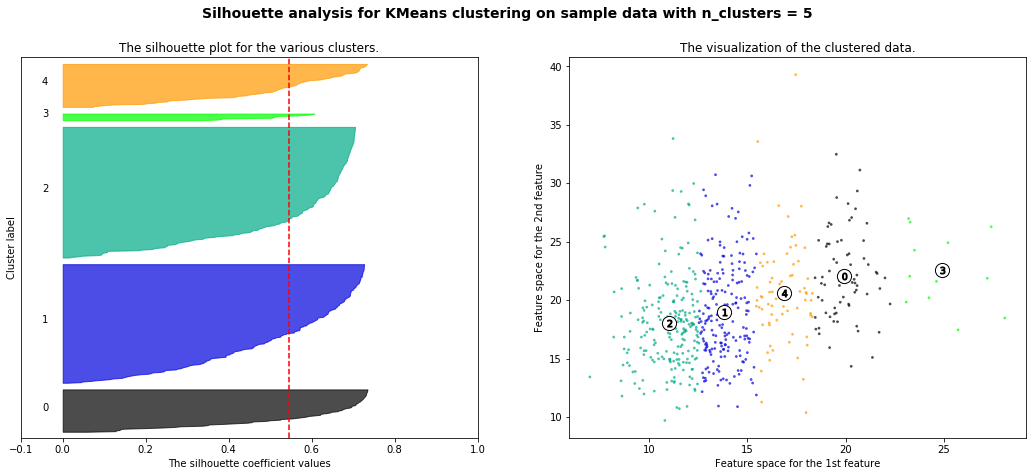

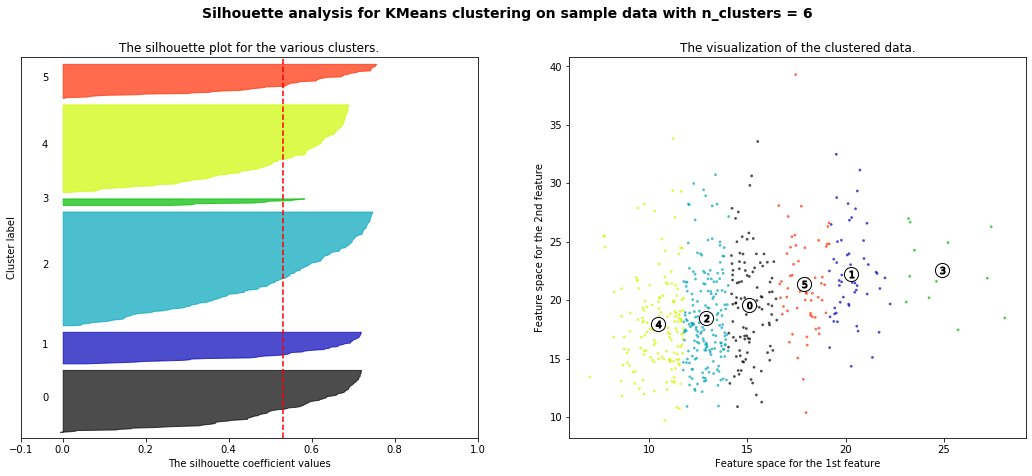

In [16]:
for i in  database_rows:
    X = df_database.loc[i,'X_data']
    y = df_database.loc[i,'y_data']
    X_and_y = df_database.loc[i,'X_and_y_data']
    print('DATASET :',i)
    print('\n')
    silhouette_method(X, y, X_and_y)
    print('\n')

# Studying the output of the Silhouette method would suggest:
# K = 2 for the Citrus data set.
# K = 2 for the Heart Disease data set.
# K = 2 for the Breast Cancer data set.

# Comparing the results from both the Elbow and Silhouette method suggests:
# K = 2 for the Citrus data set.
# K = 2 for the Heart Disease data set.
# K = 2 for the Breast Cancer data set.

# The Hybrid Approach.
# Combines K means clustering with a Random Forest classifier.
# Stratified K fold cross validation is also performed.

In [38]:
skf = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)

# Split data into folds. 



def hybrid_method(X,y):
    
    acc_scores=[]
    balanced_acc_scores=[]
    f1_scores=[]
    
    X_data = X
    y_data = y
    for train_index, test_index in skf.split(X_data, y_data):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_data_train, X_data_test = X_data[train_index], X_data[test_index]
        y_data_train, y_data_test = y_data[train_index], y_data[test_index]

        y_data_test_predict = np.copy(y_data_test) # Make the prediction array the same type and size.
        y_data_test_predict.fill(0) # Fill with zeros.

        #print(type( train_index))
        #print( train_index.shape)
        #print('len(train_index) :', len(train_index))
        #print('len(test_index) :', len(test_index))

        # The number of clusters found by the Elbow and Silhouette methods.
        num_clusters = 2

        # Run K means algorith with K = num_clusters.
        kmeans=KMeans(num_clusters,random_state=123)
        kmeans.fit(X_data_train)
        #wcss_iter = kmeans.inertia_
        #print('WCSS, inertia_: ', kmeans.inertia_ )
        # print('Cluster centres: ',kmeans.cluster_centers_ )
        labels = kmeans.labels_ 
        #print('Type labels :', type(labels))
        #print('labels shape:', labels.shape)   
        # print('Labels: ',kmeans.labels_ )
        #print('Length of Labels: ',len(kmeans.labels_) )

        closest_cluster = kmeans.predict(X_data_test)
        # print('Closest cluster: ',kmeans.predict(X_data_test)) 


        cluster_train_index = []
        cluster_test_index = []
        cluster_train_count = []
        cluster_test_count = []

        for cl in range(num_clusters):
            cluster_train_index.append([])      # Create a list of empty lists.
            cluster_train_count.append(0)       # Create a list of zeros.
            cluster_test_index.append([])      # Create a list of empty lists.
            cluster_test_count.append(0)       # Create a list of zeros.

        #print('cluster_train_index', cluster_train_index)
        #print('cluster_test_index', cluster_test_index)

        for i in range(len(train_index)):
            cl = labels[i]
            cluster_train_count[cl] += 1
            cluster_train_index[cl].append(i)     

        #for cl in range(num_clusters):
            #print('cluster_train_count[',cl,']', cluster_train_count[cl])

        #for cl in range(num_clusters):
            #print('cluster_train_index[',cl,']', cluster_train_index[cl])

        #for cl in range(num_clusters): 
            #for j in range(cluster_train_count[cl]):
                #print('cluster_train_index[',cl,'][',j,']',cluster_train_index[cl][j])  

        for i in range(len(test_index)):
            cl = closest_cluster[i]
            cluster_test_count[cl] += 1
            cluster_test_index[cl].append(i)

        cluster_type_train = []
        for cl in range(num_clusters):
            y = y_data_train[cluster_train_index[cl]]
            sum_y = sum(y)
            if sum_y == 0 or sum_y == len(y):
                cluster_type_train.append('Same')
            else:
                cluster_type_train.append('Mix')

        #for cl in range(num_clusters):
            #print('cluster_type[',cl,']',cluster_type_train[cl])

        # For each cluster fit a random forest classifier (if it has mixed class labels), and predict the class label 
        # for the test data that is closest to this cluster.

        # clf = RandomForestClassifier(max_depth=2, random_state=123, n_estimators=100)

        for cl in range(num_clusters):
            #print('cl :', cl)
            if cluster_type_train[cl] == 'Mix':
                #print('Into the Mix!')
                #X_cluster_data = X_data_train[np.array(cluster_train_index[cl])]
                X_cluster_train_data = X_data_train[cluster_train_index[cl]]
                y_cluster_train_data = y_data_train[cluster_train_index[cl]]


                clf.fit(X_cluster_train_data, y_cluster_train_data)

                if cluster_test_index[cl] != []: 
                    #print('cluster_test_index[',cl,'] :', cluster_test_index[cl])
                    #print('y_cluster_train_data',y_cluster_train_data)
                    #print('\n')
                    X_cluster_test_data = X_data_test[cluster_test_index[cl]]
                    y_cluster_test_data = y_data_test[cluster_test_index[cl]] 
                    # Perform predictions.
                    y_pred = clf.predict(X_cluster_test_data)
                    y_data_test_predict[cluster_test_index[cl]] = np.copy(y_pred)
                    y_true = y_cluster_test_data

                    #print('type(y_pred)', type(y_pred))

                #print(X_cluster_data)
            elif cluster_type_train[cl] == 'Same':
                #print('Into the Same!')

                if cluster_test_index[cl] != []:  
                    X_cluster_train_data = X_data_train[cluster_train_index[cl]]
                    y_cluster_train_data = y_data_train[cluster_train_index[cl]]
                    X_cluster_test_data = X_data_test[cluster_test_index[cl]]
                    y_cluster_test_data = y_data_test[cluster_test_index[cl]] 

                    #print('cluster_test_index[',cl,'] :', cluster_test_index[cl])
                    #print('y_cluster_train_data',y_cluster_train_data)
                    #print('\n')

                    y_true = y_cluster_test_data
                    y_pred = np.copy(y_true) # Copy, to make y_pred the same type and size as y_true.
                    # Fill elements with the class label from the training data for the given cluster.
                    # (Note the class labels are all the same, so choose the first element)
                    y_pred.fill(y_cluster_train_data[0])
                    #print('Same - y_pred :', y_pred)
                    y_data_test_predict[cluster_test_index[cl]] = np.copy(y_pred)

            else:
                print('Error: Cluster not of type Mix or Same.')

        #print('y_data_test        :',y_data_test)
        #print('y_data_test_predict:',y_data_test_predict)


        y_true = y_data_test
        y_pred = y_data_test_predict
        # Calculate scores.
        acc_score = accuracy_score(y_true, y_pred)
        acc_scores.append(acc_score)
        # print('Accuracy score:', acc_score)

        balanced_acc_score = balanced_accuracy_score(y_true, y_pred)
        balanced_acc_scores.append(balanced_acc_score)
        # print('Balanced accuracy score:', balanced_acc_score)

        f1_score_ = f1_score(y_true, y_pred)
        f1_scores.append(f1_score_)
        # print('F1 score:', f1_score_)

        #plt.plot(num_clusters, wcss)
        #plt.show()
        #print('\n')



    mean_accuracy_score = mean(acc_scores)
    sd_accuracy_score = stdev(acc_scores)
    #print('Mean accuracy score:', mean_accuracy_score)
    #print('Standard deviation accuracy score:', sd_accuracy_score)


    mean_balanced_accuracy_score = mean(balanced_acc_scores)
    sd_balanced_accuracy_score = stdev(balanced_acc_scores)
    #print('Mean balanced accuracy score:', mean_balanced_accuracy_score)
    #print('Standard deviation balanced Accuracy score:', sd_balanced_accuracy_score)


    mean_f1_score = mean(f1_scores)
    sd_f1_score = stdev(f1_scores)
    #print('Mean f1 score:', mean_f1_score)
    #print('Standard deviation f1 score:', sd_f1_score)

    # print('\n')

    #Create a list of results.
    # scores = [mean_accuracy_score, sd_accuracy_score, mean_balanced_accuracy_score, sd_balanced_accuracy_score, mean_f1_score, sd_f1_score]                                    
    # return(scores)

    score_summary, score_data = [mean_accuracy_score, sd_accuracy_score, mean_balanced_accuracy_score, sd_balanced_accuracy_score, mean_f1_score, sd_f1_score],[acc_scores, balanced_acc_scores, f1_scores]
    results = [score_summary, score_data]
    return(results)


In [39]:
# Create a dataframe of scores.
row_names = database_rows # i.e. ['Citrus', 'Heart Disease', 'Breast Cancer']
column_names = ['Mean Acc', 'SD Acc', 'Mean Bal Acc', 'SD Bal Acc', 'Mean F1', 'SD F1' ]

df_scores3 = pd.DataFrame(columns = column_names, index=row_names)

column_names = ['Acc', 'Bal Acc','F1']
df_score_data3 = pd.DataFrame(columns = column_names, index=row_names)
   
# Fit the classifier and return the score for all the datasets.

for i in  database_rows:
    scores_summary3, score_data3  = hybrid_method(df_database.loc[i,'X_data'],df_database.loc[i,'y_data'])
    df_scores3.at[i] = scores_summary3
    df_score_data3.at[i] =  score_data3 

print(df_scores3)






               Mean Acc      SD Acc Mean Bal Acc  SD Bal Acc   Mean F1  \
Citrus         0.998561  0.00221104       0.9992  0.00122927  0.999198   
Heart Disease  0.858939   0.0728705     0.668934    0.152426  0.918892   
Breast Cancer  0.898017   0.0388216     0.874488   0.0488365  0.922904   

                    SD F1  
Citrus         0.00123399  
Heart Disease   0.0406066  
Breast Cancer   0.0279491  


In [40]:
# Summary of results.
print(df_scores1)
print(df_scores2)
print(df_scores3)

#Save to .csv file.
df_scores1.to_csv('D:/My Documents/Essex Mdrive/Data Science and DM/Assignment 2 files/Data/Results/Random_forest.csv')
df_scores2.to_csv('D:/My Documents/Essex Mdrive/Data Science and DM/Assignment 2 files/Data/Results/Random_forest_strat.csv')
df_scores3.to_csv('D:/My Documents/Essex Mdrive/Data Science and DM/Assignment 2 files/Data/Results/Hybrid.csv')

               Mean Acc      SD Acc Mean Bal Acc   SD Bal Acc   Mean F1  \
Citrus         0.998561  0.00141982       0.9992  0.000797027  0.999199   
Heart Disease   0.86381   0.0910716     0.697222     0.148985  0.919221   
Breast Cancer  0.894392   0.0542314     0.875683    0.0589832  0.917861   

                    SD F1  
Citrus         0.00079854  
Heart Disease   0.0576729  
Breast Cancer   0.0450075  
               Mean Acc      SD Acc Mean Bal Acc  SD Bal Acc   Mean F1  \
Citrus         0.998561  0.00221104       0.9992  0.00122927  0.999198   
Heart Disease  0.858939   0.0647997     0.668934    0.137453  0.918724   
Breast Cancer  0.887366   0.0356124     0.862078   0.0439995  0.914907   

                    SD F1  
Citrus         0.00123399  
Heart Disease   0.0363418  
Breast Cancer   0.0257407  
               Mean Acc      SD Acc Mean Bal Acc  SD Bal Acc   Mean F1  \
Citrus         0.998561  0.00221104       0.9992  0.00122927  0.999198   
Heart Disease  0.858939   0.07

# Produce Boxplots.

In [42]:
rf_acc_to_plot =      [df_score_data1.loc['Citrus','Acc'], df_score_data1.loc['Heart Disease','Acc'], df_score_data1.loc['Breast Cancer','Acc']]
rf_bal_acc_to_plot =  [df_score_data1.loc['Citrus','Bal Acc'], df_score_data1.loc['Heart Disease','Bal Acc'], df_score_data1.loc['Breast Cancer','Bal Acc']]
rf_f1_to_plot =       [df_score_data1.loc['Citrus','F1'], df_score_data1.loc['Heart Disease','F1'], df_score_data1.loc['Breast Cancer','F1']]

rfs_acc_to_plot =      [df_score_data2.loc['Citrus','Acc'], df_score_data2.loc['Heart Disease','Acc'], df_score_data2.loc['Breast Cancer','Acc']]
rfs_bal_acc_to_plot =  [df_score_data2.loc['Citrus','Bal Acc'], df_score_data2.loc['Heart Disease','Bal Acc'], df_score_data2.loc['Breast Cancer','Bal Acc']]
rfs_f1_to_plot =       [df_score_data2.loc['Citrus','F1'], df_score_data2.loc['Heart Disease','F1'], df_score_data2.loc['Breast Cancer','F1']]

hybrid_acc_to_plot =      [df_score_data3.loc['Citrus','Acc'], df_score_data3.loc['Heart Disease','Acc'], df_score_data3.loc['Breast Cancer','Acc']]
hybrid_bal_acc_to_plot =  [df_score_data3.loc['Citrus','Bal Acc'], df_score_data3.loc['Heart Disease','Bal Acc'], df_score_data3.loc['Breast Cancer','Bal Acc']]
hybrid_f1_to_plot =       [df_score_data3.loc['Citrus','F1'], df_score_data3.loc['Heart Disease','F1'], df_score_data3.loc['Breast Cancer','F1']]

citrus_plots =  [rf_acc_to_plot[0],rfs_acc_to_plot[0],hybrid_acc_to_plot[0],    rf_bal_acc_to_plot[0],rfs_bal_acc_to_plot[0],hybrid_bal_acc_to_plot[0], rf_f1_to_plot[0],rfs_f1_to_plot[0],hybrid_f1_to_plot[0]]
heart_plots =  [rf_acc_to_plot[1],rfs_acc_to_plot[1],hybrid_acc_to_plot[1],    rf_bal_acc_to_plot[1],rfs_bal_acc_to_plot[1],hybrid_bal_acc_to_plot[1], rf_f1_to_plot[1],rfs_f1_to_plot[1],hybrid_f1_to_plot[1]]
breast_plots = [rf_acc_to_plot[2],rfs_acc_to_plot[2],hybrid_acc_to_plot[2],    rf_bal_acc_to_plot[2],rfs_bal_acc_to_plot[2],hybrid_bal_acc_to_plot[2], rf_f1_to_plot[2],rfs_f1_to_plot[2],hybrid_f1_to_plot[2]]



In [22]:
def plot_boxplots(title, data_to_plot):
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))
    
    fig.suptitle(title+' Scores', fontsize=14, fontweight='bold')

    # Create an axes instance
    ax = fig.add_subplot(111)

    # Create the boxplot
    #bp = ax.boxplot(citrus_to_plot)

    ## add patch_artist=True option to ax.boxplot() 
    ## to get fill color
    bp = ax.boxplot(data_to_plot, patch_artist=True)

    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
        box.set( facecolor = '#1b9e77' )

    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=2)

    ## change the style of fliers and their fill
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)

    ## Custom x-axis labels
    ax.set_xticklabels(['RF Acc', 'RF (strat) Acc', 'Hybrid Acc','RF Bal Acc','RF (strat) Bal Acc', 'Hybrid Bal Acc', 'RF F1', 'RF (strat) F1', 'Hybrid F1' ])
    plt.xticks(rotation=90)
    

    # Save the figure
    filename = 'D:/My Documents/Essex Mdrive/Data Science and DM/Assignment 2 files/Plots/'+title+'_Plot'+'.png'
    fig.savefig(filename, bbox_inches='tight')
    

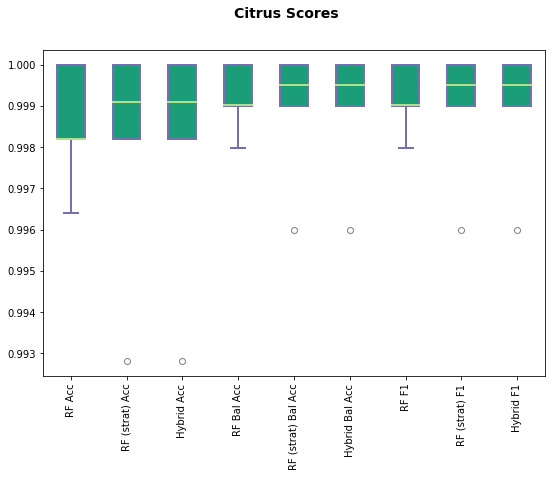

In [43]:
plot_boxplots('Citrus',citrus_plots)



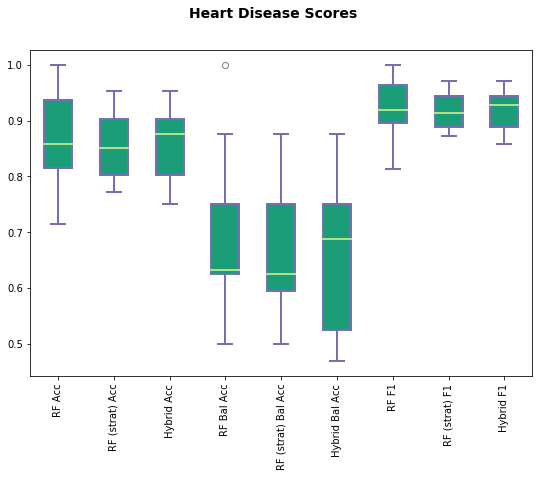

In [44]:
plot_boxplots('Heart Disease',heart_plots)

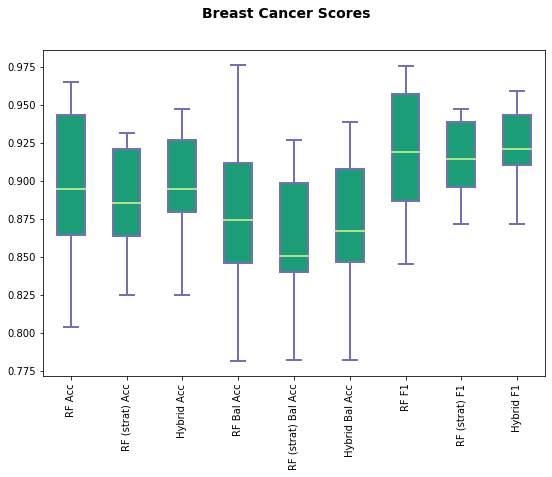

In [46]:
plot_boxplots('Breast Cancer',breast_plots)

# Below is code that was written in order to help in development and testing.
# This has been intentionally left here for your information.

# TEST simple DATA set

[[0.8 0.8]
 [0.9 1.1]
 [1.2 1.2]
 [2.2 2.4]
 [2.4 2.7]
 [2.2 2.5]
 [3.6 3.8]
 [3.5 3.4]
 [3.9 3.8]
 [6.4 6.1]
 [6.6 6.1]
 [6.5 6.2]]
<class 'numpy.ndarray'>
(12, 2)
[0 1 1 0 0 1 1 1 0 1 1 0]
<class 'numpy.ndarray'>
(12,)


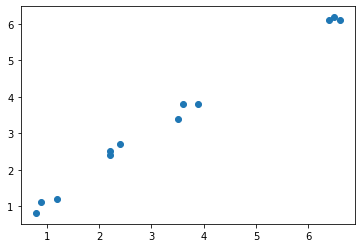

In [47]:
import numpy as np

#Test Code Below

#data = np.array([[0.8, 0.8],[1.2, 1.2],[2.2, 2.4],[2.2, 2.5],[3.6, 3.8],[3.5, 3.4]])
X_data = np.array(([0.8, 0.8],[0.9, 1.1],[1.2, 1.2],[2.2, 2.4],[2.4, 2.7],[2.2, 2.5],[3.6, 3.8],[3.5, 3.4],[3.9, 3.8],[6.4, 6.1],[6.6, 6.1],[6.5, 6.2]))

y_data = np.array([0,1,1,0,0,1,1,1,0,1,1,0])


print(X_data)
print(type(X_data))
print(X_data.shape)

print(y_data)
print(type(y_data))
print(y_data.shape)


#print('counting...')
#unique, counts = np.unique(y_data, return_counts=True)
#print(unique)
#print(counts)
#print(np.asarray((unique, counts)).T)
#print('summing...')
#print(sum(y_data))

#print('Shape =', data.shape)
#print('Size =', data.size)
#print('Dimension -', data.ndim)

plt.scatter(X_data[:,0],X_data[:,1])

# DATA set. K means and RF.

In [48]:
   
skf = StratifiedKFold(n_splits=4, random_state=123, shuffle=True)

# Split data into folds. 

acc_scores=[]
balanced_acc_scores=[]
f1_scores=[]

for train_index, test_index in skf.split(X_data, y_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_data_train, X_data_test = X_data[train_index], X_data[test_index]
    y_data_train, y_data_test = y_data[train_index], y_data[test_index]
    
    y_data_test_predict = np.copy(y_data_test) # Make the prediction array the same type and size.
    y_data_test_predict.fill(99) # Fill with zeros.
    print(type(y_data_test))
    print('y_data_test',y_data_test)
    print('y_data_test_predict',y_data_test_predict)
    
    #print(type(train_index))
    #print( train_index.shape)
    #print('len(train_index) :', len(train_index))
    #print('len(test_index) :', len(test_index))
    
    # The number of clusters found by the Elbow and Silhouette methods.
    num_clusters = 4

    # Run K means algorith with K = num_clusters.
    kmeans=KMeans(num_clusters,random_state=123)
    kmeans.fit(X_data_train)
    #wcss_iter = kmeans.inertia_
    #print('WCSS, inertia_: ', kmeans.inertia_ )
    #print('Cluster centres: ',kmeans.cluster_centers_ )
    labels = kmeans.labels_ 
    #print('Type labels :', type(labels))
    #print('labels shape:', labels.shape)   
    print('Cluster labels: ',kmeans.labels_ )
    #print('Length of Labels: ',len(kmeans.labels_) )
    
    closest_cluster = kmeans.predict(X_data_test)
    print('Closest cluster: ',kmeans.predict(X_data_test)) 
    
    
    cluster_train_index = []
    cluster_test_index = []
    cluster_train_count = []
    cluster_test_count = []
    
    for cl in range(num_clusters):
        cluster_train_index.append([])      # Create a list of empty lists.
        cluster_train_count.append(0)       # Create a list of zeros.
        cluster_test_index.append([])      # Create a list of empty lists.
        cluster_test_count.append(0)       # Create a list of zeros.
        
    print('cluster_train_index', cluster_train_index)
    print('cluster_train_count', cluster_train_count)
    print('cluster_test_index', cluster_test_index)
    print('cluster_test_count', cluster_test_count)
    
    for i in range(len(train_index)):
        cl = labels[i]
        cluster_train_count[cl] += 1
        cluster_train_index[cl].append(i)     
        
    print('cluster_train_index', cluster_train_index)
    print('cluster_train__count', cluster_train_count)
    
    #for cl in range(num_clusters):
        #print('cluster_train_count[',cl,']', cluster_train_count[cl])
        
    #for cl in range(num_clusters):
        #print('cluster_train_index[',cl,']', cluster_train_index[cl])
        
    #for cl in range(num_clusters): 
        #for j in range(cluster_train_count[cl]):
            #print('cluster_train_index[',cl,'][',j,']',cluster_train_index[cl][j])  
                           
    for i in range(len(test_index)):
        cl = closest_cluster[i]
        cluster_test_count[cl] += 1
        cluster_test_index[cl].append(i)
        
    print('cluster_test_index', cluster_test_index)
    print('cluster_test_count', cluster_test_count)
        
    cluster_type_train = []
    for cl in range(num_clusters):
        y = y_data_train[cluster_train_index[cl]]
        
        print('y_data_train[cluster_train_index[',cl,']',y)
        
        sum_y = sum(y)
        if sum_y == 0 or sum_y == len(y):
            cluster_type_train.append('Same')
            print('Cluster ', cl, ' Same')
        else:
            cluster_type_train.append('Mix')
            print('Cluster ', cl, ' Mix')
            
    for cl in range(num_clusters):
        print('cluster_type[',cl,']',cluster_type_train[cl])

        
        
    #print('type(cluster_train_index[0])',type(cluster_train_index[0]))
    #print('cluster_train_index[0] :',cluster_train_index[0])
    #mylist=list(cluster_train_index[0])
   
    
        
    # For each cluster fit a random forest classifier (if it has mixed class labels), and predict the class label 
    # for the test data that is closest to this cluster.
    
    clf = RandomForestClassifier(max_depth=2, random_state=123, n_estimators=100)
    
    for cl in range(num_clusters):
        print('cl :', cl)
        if cluster_type_train[cl] == 'Mix':
            print('Into the Mix!')
            #X_cluster_data = X_data_train[np.array(cluster_train_index[cl])]
            X_cluster_train_data = X_data_train[cluster_train_index[cl]]
            y_cluster_train_data = y_data_train[cluster_train_index[cl]]

            
            clf.fit(X_cluster_train_data, y_cluster_train_data)
            
            if cluster_test_index[cl] != []: 
                print('cluster_test_index[',cl,'] :', cluster_test_index[cl])
                print('y_cluster_train_data',y_cluster_train_data)
                print('\n')
                X_cluster_test_data = X_data_test[cluster_test_index[cl]]
                y_cluster_test_data = y_data_test[cluster_test_index[cl]] 
                # Perform predictions.
                y_pred = clf.predict(X_cluster_test_data)
                y_data_test_predict[cluster_test_index[cl]] = np.copy(y_pred)
                y_true = y_cluster_test_data
                
                print('type(y_pred)', type(y_pred))
            
            #print(X_cluster_data)
        elif cluster_type_train[cl] == 'Same':
            print('Into the Same!')
            
            if cluster_test_index[cl] != []:  
                X_cluster_train_data = X_data_train[cluster_train_index[cl]]
                y_cluster_train_data = y_data_train[cluster_train_index[cl]]
                X_cluster_test_data = X_data_test[cluster_test_index[cl]]
                y_cluster_test_data = y_data_test[cluster_test_index[cl]] 
                
                print('cluster_test_index[',cl,'] :', cluster_test_index[cl])
                print('y_cluster_train_data',y_cluster_train_data)
                print('\n')
                
                y_true = y_cluster_test_data
                y_pred = np.copy(y_true) # Copy, to make y_pred the same type and size as y_true.
                # Fill elements with the class label from the training data for the given cluster.
                # (Note the class labels are all the same, so choose the first element)
                y_pred.fill(y_cluster_train_data[0])
                print('Same - y_pred :', y_pred)
                y_data_test_predict[cluster_test_index[cl]] = np.copy(y_pred)
            
        else:
            print('Error: Cluster not of type Mix or Same.')

    print('y_data_test        :',y_data_test)
    print('y_data_test_predict:',y_data_test_predict)
    
    
    y_true = y_data_test
    y_pred = y_data_test_predict
    # Calculate scores.
    acc_score = accuracy_score(y_true, y_pred)
    acc_scores.append(acc_score)
    # print('Accuracy score:', acc_score)

    balanced_acc_score = balanced_accuracy_score(y_true, y_pred)
    balanced_acc_scores.append(balanced_acc_score)
    # print('Balanced accuracy score:', balanced_acc_score)

    f1_score_ = f1_score(y_true, y_pred)
    f1_scores.append(f1_score_)
    # print('F1 score:', f1_score_)

    #plt.plot(num_clusters, wcss)
    # plt.show()
    print('\n')
    
    
    
mean_accuracy_score = mean(acc_scores)
sd_accuracy_score = stdev(acc_scores)
print('Mean accuracy score:', mean_accuracy_score)
print('Standard deviation accuracy score:', sd_accuracy_score)


mean_balanced_accuracy_score = mean(balanced_acc_scores)
sd_balanced_accuracy_score = stdev(balanced_acc_scores)
print('Mean balanced accuracy score:', mean_balanced_accuracy_score)
print('Standard deviation balanced Accuracy score:', sd_balanced_accuracy_score)


mean_f1_score = mean(f1_scores)
sd_f1_score = stdev(f1_scores)
print('Mean f1 score:', mean_f1_score)
print('Standard deviation f1 score:', sd_f1_score)

# print('\n')

#Create a list of results.
scores = [mean_accuracy_score, sd_accuracy_score, mean_balanced_accuracy_score, sd_balanced_accuracy_score, mean_f1_score, sd_f1_score]                                    
print(scores)
    


TRAIN: [ 0  2  4  5  6  9 10 11] TEST: [1 3 7 8]
<class 'numpy.ndarray'>
y_data_test [1 0 1 0]
y_data_test_predict [99 99 99 99]
Cluster labels:  [2 2 1 1 3 0 0 0]
Closest cluster:  [2 1 3 3]
cluster_train_index [[], [], [], []]
cluster_train_count [0, 0, 0, 0]
cluster_test_index [[], [], [], []]
cluster_test_count [0, 0, 0, 0]
cluster_train_index [[5, 6, 7], [2, 3], [0, 1], [4]]
cluster_train__count [3, 2, 2, 1]
cluster_test_index [[], [1], [0], [2, 3]]
cluster_test_count [0, 1, 1, 2]
y_data_train[cluster_train_index[ 0 ] [1 1 0]
Cluster  0  Mix
y_data_train[cluster_train_index[ 1 ] [0 1]
Cluster  1  Mix
y_data_train[cluster_train_index[ 2 ] [0 1]
Cluster  2  Mix
y_data_train[cluster_train_index[ 3 ] [1]
Cluster  3  Same
cluster_type[ 0 ] Mix
cluster_type[ 1 ] Mix
cluster_type[ 2 ] Mix
cluster_type[ 3 ] Same
cl : 0
Into the Mix!
cl : 1
Into the Mix!
cluster_test_index[ 1 ] : [1]
y_cluster_train_data [0 1]


type(y_pred) <class 'numpy.ndarray'>
cl : 2
Into the Mix!
cluster_test_index[ 

C:\Users\David Brookes\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


 2
Into the Mix!
cluster_test_index[ 2 ] : [2]
y_cluster_train_data [1 0]


type(y_pred) <class 'numpy.ndarray'>
cl : 3
Into the Same!
cluster_test_index[ 3 ] : [0]
y_cluster_train_data [1 1]


Same - y_pred : [1]
y_data_test        : [0 1 1]
y_data_test_predict: [1 0 1]


TRAIN: [ 0  1  3  5  6  7  8  9 10 11] TEST: [2 4]
<class 'numpy.ndarray'>
y_data_test [1 0]
y_data_test_predict [99 99]
Cluster labels:  [3 3 0 0 2 2 2 1 1 1]
Closest cluster:  [3 0]
cluster_train_index [[], [], [], []]
cluster_train_count [0, 0, 0, 0]
cluster_test_index [[], [], [], []]
cluster_test_count [0, 0, 0, 0]
cluster_train_index [[2, 3], [7, 8, 9], [4, 5, 6], [0, 1]]
cluster_train__count [2, 3, 3, 2]
cluster_test_index [[1], [], [], [0]]
cluster_test_count [1, 0, 0, 1]
y_data_train[cluster_train_index[ 0 ] [0 1]
Cluster  0  Mix
y_data_train[cluster_train_index[ 1 ] [1 1 0]
Cluster  1  Mix
y_data_train[cluster_train_index[ 2 ] [1 1 0]
Cluster  2  Mix
y_data_train[cluster_train_index[ 3 ] [0 1]
Cluster  3  M

# DATA set. Silhouette method.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7035922386589339
For n_clusters = 3 The average silhouette_score is : 0.7180756882488843
For n_clusters = 4 The average silhouette_score is : 0.8419828612693491
For n_clusters = 5 The average silhouette_score is : 0.7073202799109359
For n_clusters = 6 The average silhouette_score is : 0.545073812131137
For n_clusters = 7 The average silhouette_score is : 0.4515151891485194


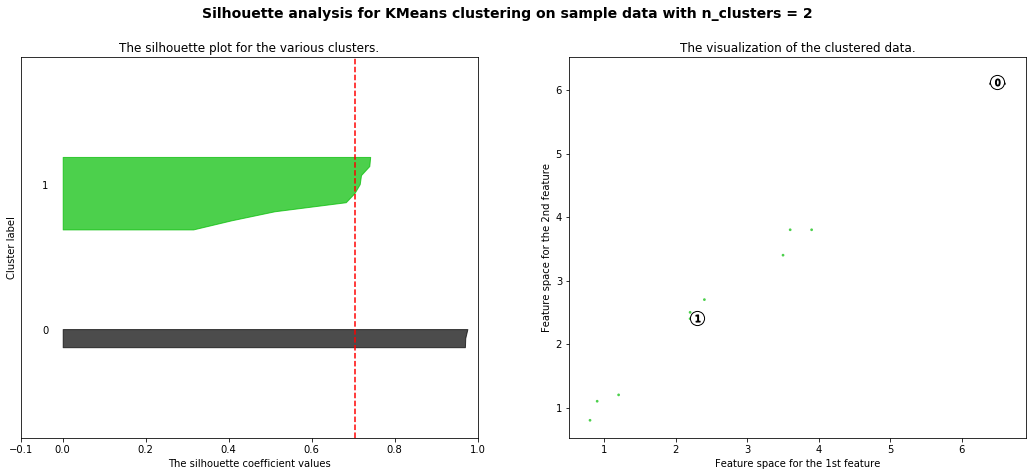

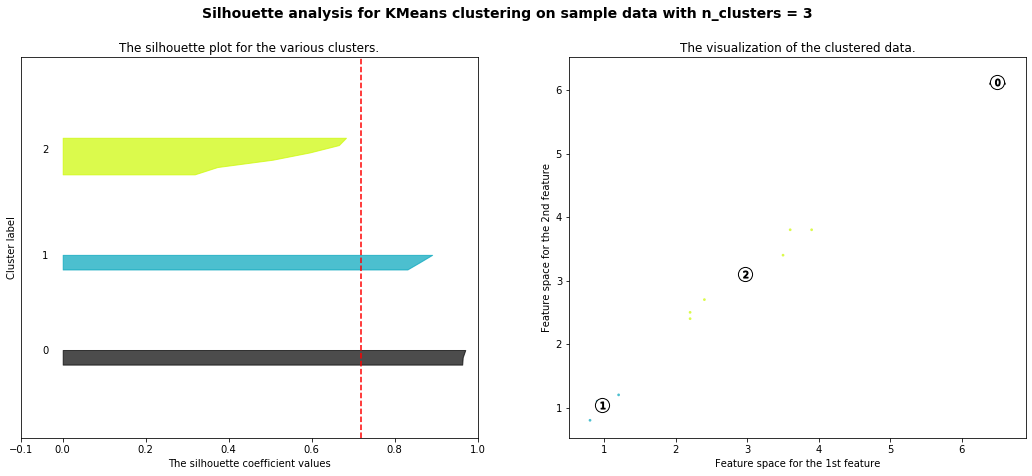

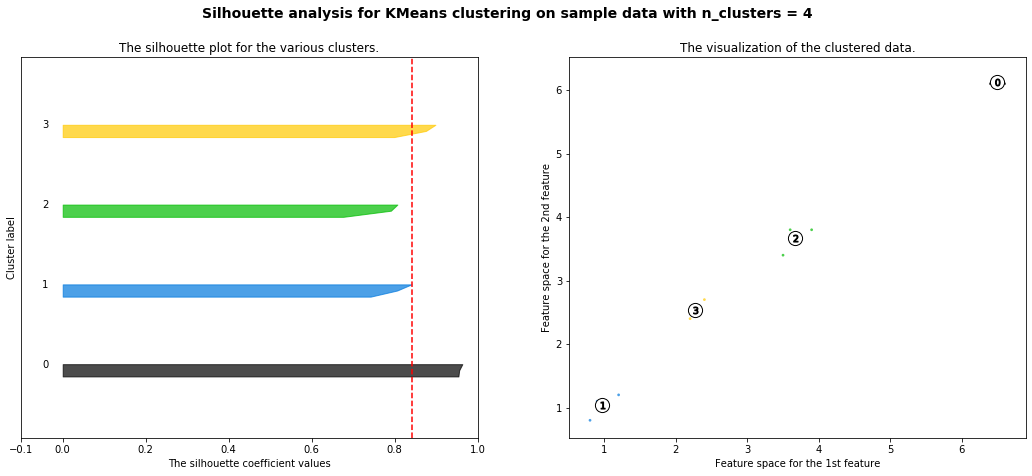

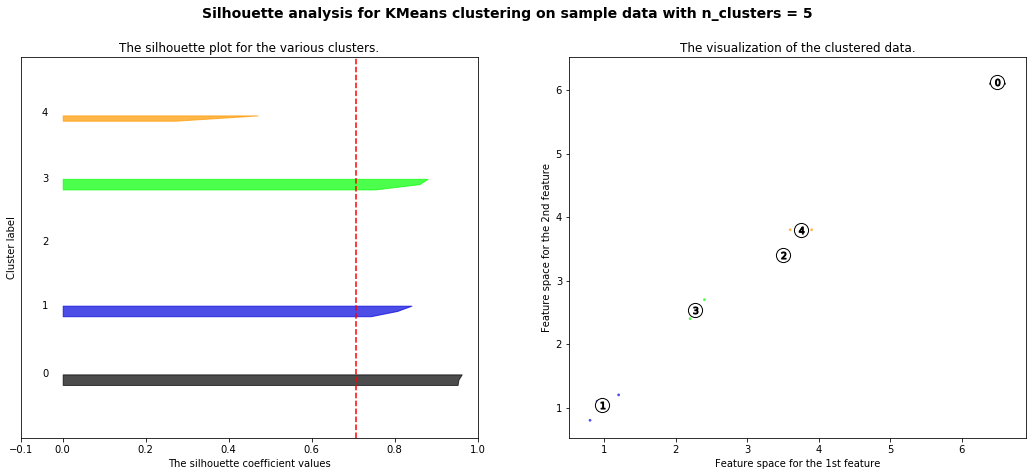

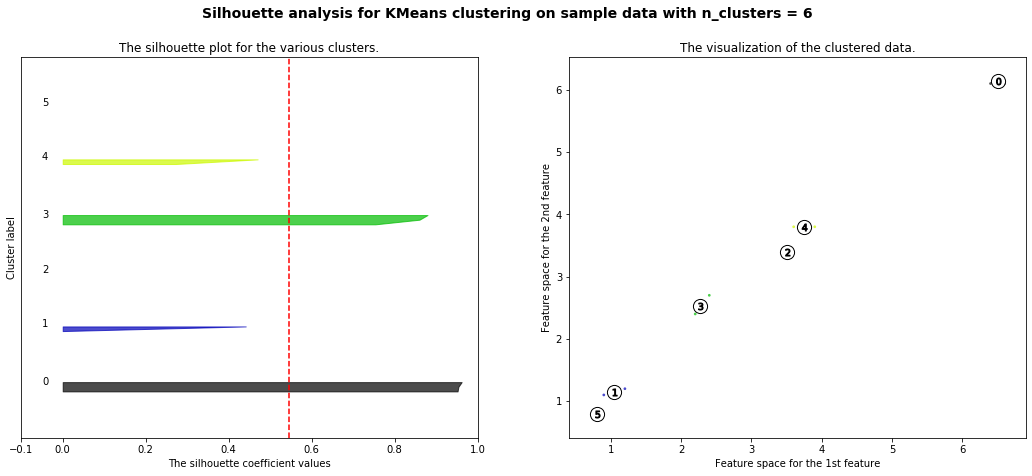

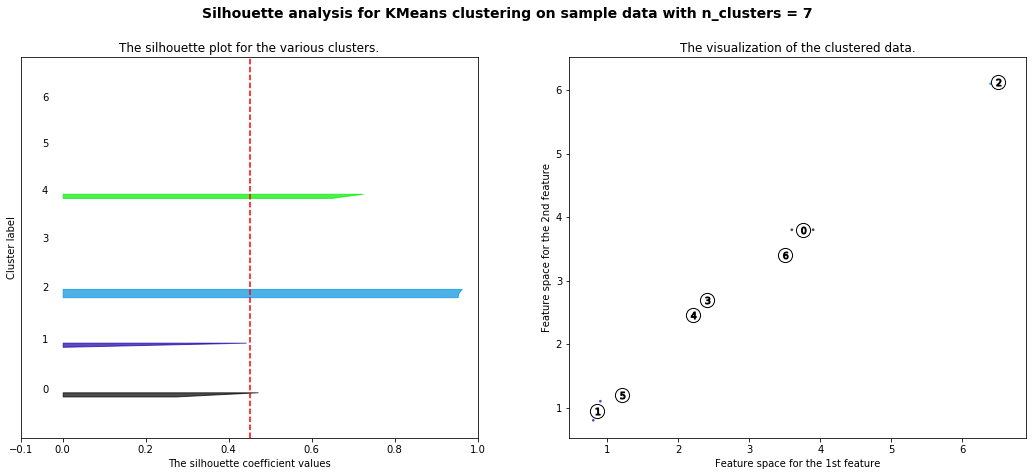

In [49]:
#from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
#                  n_features=2,
#                  centers=4,
#                  cluster_std=1,
#                 center_box=(-10.0, 10.0),
#                  shuffle=True,
#                  random_state=1)  # For reproducibility

X = X_data

range_n_clusters = [2, 3, 4, 5, 6,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [53]:
cluster_index = []
for i in range(5):
    cluster_index.append([])
print(cluster_index)
print(cluster_index[0])

for i in range(5):
    cluster_index[i].append(i)
print(cluster_index)

for i in range(5):
    cluster_index[i].append(i*3)
print(cluster_index)

print(cluster_index[4])

[[], [], [], [], []]
[]
[[0], [1], [2], [3], [4]]
[[0, 0], [1, 3], [2, 6], [3, 9], [4, 12]]
[4, 12]


In [54]:
x=[1, 2, 3, 4]
x = np.array(x)
index=[1, 3]
x[index]=[99,100]
print(x)
index2=[0, 2]
x[index2]=[77,88]
print(x)

[  1  99   3 100]
[ 77  99  88 100]


In [55]:
x=[1, 2, 3, 4]
x = np.array(x)
print('x:',x)
y = np.copy(x) # y=x does NOT do what you might expect!!!!!
print('y:',y)
y.fill(99)
print('y:',y)
print('x:',x)

x: [1 2 3 4]
y: [1 2 3 4]
y: [99 99 99 99]
x: [1 2 3 4]
